In [1]:
import numpy as np
import pandas as pd
import os

print(os.listdir("/kaggle/input/stanford-dogs-dataset/images/Images/"))

['n02091635-otterhound', 'n02102318-cocker_spaniel', 'n02101388-Brittany_spaniel', 'n02088094-Afghan_hound', 'n02085936-Maltese_dog', 'n02104365-schipperke', 'n02100877-Irish_setter', 'n02086079-Pekinese', 'n02099601-golden_retriever', 'n02100583-vizsla', 'n02102177-Welsh_springer_spaniel', 'n02093256-Staffordshire_bullterrier', 'n02106166-Border_collie', 'n02093991-Irish_terrier', 'n02109961-Eskimo_dog', 'n02110958-pug', 'n02105412-kelpie', 'n02094433-Yorkshire_terrier', 'n02097474-Tibetan_terrier', 'n02089867-Walker_hound', 'n02110627-affenpinscher', 'n02113186-Cardigan', 'n02102040-English_springer', 'n02089973-English_foxhound', 'n02098286-West_Highland_white_terrier', 'n02095570-Lakeland_terrier', 'n02087394-Rhodesian_ridgeback', 'n02101006-Gordon_setter', 'n02098413-Lhasa', 'n02099429-curly-coated_retriever', 'n02088364-beagle', 'n02108551-Tibetan_mastiff', 'n02102480-Sussex_spaniel', 'n02109525-Saint_Bernard', 'n02087046-toy_terrier', 'n02113799-standard_poodle', 'n02107683-Bern

In [2]:
# 以其中10种的分类为例
dir = '/kaggle/input/stanford-dogs-dataset/images/Images/'
chihuahua_dir = dir + 'n02085620-Chihuahua'
japanese_spaniel_dir = dir+'n02085782-Japanese_spaniel' #日本狆
maltese_dir = dir+'n02085936-Maltese_dog' #马尔济斯犬
pekinese_dir = dir+'n02086079-Pekinese' #狮子狗
shitzu_dir = dir+'n02086240-Shih-Tzu' #西施犬
blenheim_spaniel_dir = dir+'n02086646-Blenheim_spaniel' #英国可卡犬
papillon_dir = dir+'n02086910-papillon' #蝴蝶犬
toy_terrier_dir = dir+'n02087046-toy_terrier' #玩具猎狐梗
afghan_hound_dir = dir+'n02088094-Afghan_hound' #阿富汗猎犬
basset_dir = dir+'n02088238-basset' #巴吉度猎犬

In [3]:
import cv2
X = []
y_label = []
imgsize = 150
# 定义一个函数读入狗狗图像
def training_data(label, data_dir):
    print("正在读入：", data_dir)
    for img in os.listdir(data_dir):
        path = os.path.join(data_dir, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (imgsize, imgsize))
        X.append(np.array(img))
        y_label.append(str(label))

training_data('chihuahua', chihuahua_dir)
training_data('japanese_spaniel', japanese_spaniel_dir)
training_data('maltese', maltese_dir)
training_data('pekinese', pekinese_dir)
training_data('shitzu', shitzu_dir)
training_data('blenheim_spaniel', blenheim_spaniel_dir)
training_data('papillon', papillon_dir)
training_data('toy_terrier', toy_terrier_dir)
training_data('afghan_hound', afghan_hound_dir)
training_data('basset', basset_dir)

正在读入： /kaggle/input/stanford-dogs-dataset/images/Images/n02085620-Chihuahua
正在读入： /kaggle/input/stanford-dogs-dataset/images/Images/n02085782-Japanese_spaniel
正在读入： /kaggle/input/stanford-dogs-dataset/images/Images/n02085936-Maltese_dog
正在读入： /kaggle/input/stanford-dogs-dataset/images/Images/n02086079-Pekinese
正在读入： /kaggle/input/stanford-dogs-dataset/images/Images/n02086240-Shih-Tzu
正在读入： /kaggle/input/stanford-dogs-dataset/images/Images/n02086646-Blenheim_spaniel
正在读入： /kaggle/input/stanford-dogs-dataset/images/Images/n02086910-papillon
正在读入： /kaggle/input/stanford-dogs-dataset/images/Images/n02087046-toy_terrier
正在读入： /kaggle/input/stanford-dogs-dataset/images/Images/n02088094-Afghan_hound
正在读入： /kaggle/input/stanford-dogs-dataset/images/Images/n02088238-basset


In [4]:
'''
import matplotlib.pyplot as plt
import random as rdm

fig, ax = plt.subplots(5,2) #注意s
fig.set_size_inches(15,15)
for i in range(5):
    for j in range(2):
        r = rdm.randint(0, len(X))
        ax[i,j].imshow(X[r])
        ax[i,j].set_title('Dog:'+y_label[r])
plt.tight_layout()
'''

"\nimport matplotlib.pyplot as plt\nimport random as rdm\n\nfig, ax = plt.subplots(5,2) #注意s\nfig.set_size_inches(15,15)\nfor i in range(5):\n    for j in range(2):\n        r = rdm.randint(0, len(X))\n        ax[i,j].imshow(X[r])\n        ax[i,j].set_title('Dog:'+y_label[r])\nplt.tight_layout()\n"

In [5]:
# 这段代码不可以重复运行，每运行一次X就要变小255倍
from sklearn.preprocessing import LabelEncoder # 标签编码工具
from keras.utils import to_categorical # 导入1-hot编码工具
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_label) # 标签编码
# y.size
y = to_categorical(y, 10) # 将标签转化为1-hot
X = np.array(X)
X = X/255 # 将像素值都归一化到0-1之间
X.shape, y.shape
# len(X) #1922

2024-03-20 07:39:26.051436: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 07:39:26.051571: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 07:39:26.294377: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


((1922, 150, 150, 3), (1922, 10))

In [6]:
X[1]

array([[[0.89803922, 0.8627451 , 0.81176471],
        [0.89019608, 0.85490196, 0.80392157],
        [0.94117647, 0.90196078, 0.85490196],
        ...,
        [0.82352941, 0.79215686, 0.7372549 ],
        [0.82745098, 0.8       , 0.72156863],
        [0.83137255, 0.79607843, 0.69411765]],

       [[0.92941176, 0.89411765, 0.84313725],
        [0.9254902 , 0.89019608, 0.83921569],
        [0.93333333, 0.89803922, 0.84705882],
        ...,
        [0.82352941, 0.8       , 0.7254902 ],
        [0.82745098, 0.80392157, 0.71372549],
        [0.84705882, 0.81568627, 0.70588235]],

       [[0.9254902 , 0.89019608, 0.83921569],
        [0.93333333, 0.89803922, 0.84705882],
        [0.89411765, 0.85882353, 0.80784314],
        ...,
        [0.82352941, 0.80784314, 0.71372549],
        [0.82745098, 0.81176471, 0.69803922],
        [0.83529412, 0.81176471, 0.68235294]],

       ...,

       [[0.65098039, 0.69411765, 0.7254902 ],
        [0.70196078, 0.74509804, 0.77647059],
        [0.70588235, 0

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape
# y_train.shape, y_test.shape

((1537, 150, 150, 3), (385, 150, 150, 3))

In [8]:
from keras import layers # 导入所有层
from keras import models # 导入所有模型
from keras import optimizers

cnn = models.Sequential()
cnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3))) # 卷积层，32个特征，3x3的卷积核
cnn.add(layers.MaxPooling2D(2,2)) # 最大池化层
cnn.add(layers.Dropout(0.5))
cnn.add(layers.Conv2D(64, (3,3), activation='relu')) # 卷积层
cnn.add(layers.MaxPooling2D(2,2)) # 最大池化层
cnn.add(layers.Dropout(0.5))
cnn.add(layers.Conv2D(128, (3,3), activation='relu')) # 卷积层
cnn.add(layers.MaxPooling2D(2,2)) # 最大池化层
cnn.add(layers.Dropout(0.5))
cnn.add(layers.Conv2D(256, (3,3), activation='relu')) # 卷积层
cnn.add(layers.MaxPooling2D(2,2)) # 最大池化层
cnn.add(layers.Dropout(0.5))
cnn.add(layers.Conv2D(256, (3,3), activation='relu')) # 卷积层
cnn.add(layers.MaxPooling2D(2,2)) # 最大池化层
cnn.add(layers.Flatten())
cnn.add(layers.Dense(512, activation='relu'))
cnn.add(layers.Dropout(0.5))
cnn.add(layers.Dense(10, activation='softmax'))
cnn.compile(loss='categorical_crossentropy',
           optimizer= optimizers.Adam(lr=1e-4), # 更新优化器，控制学习速率
           metrics=['acc'])
cnn.summary()

# Conv2D是对平面图像的卷积层

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

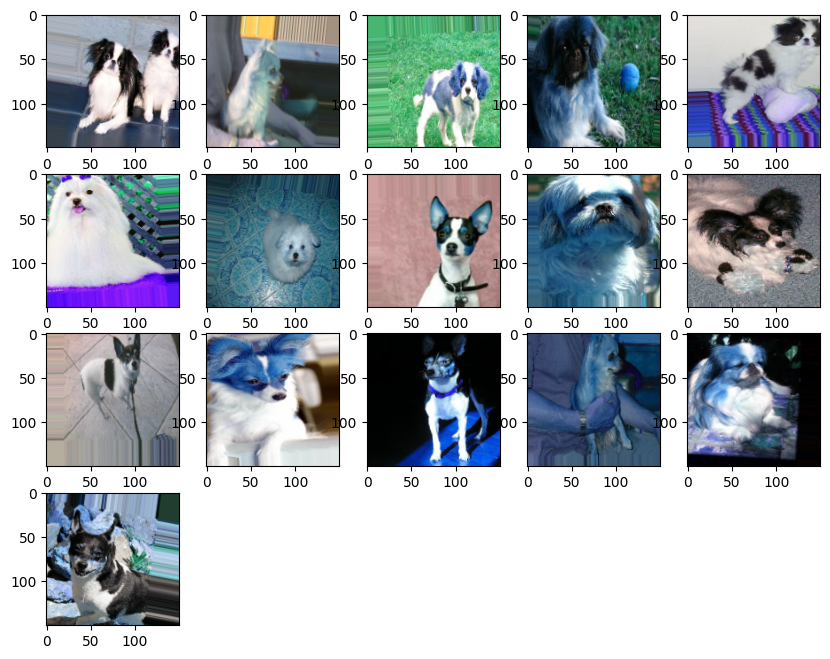

In [9]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

augs_gen = ImageDataGenerator(
            zca_whitening=False,
            rotation_range=10,
            width_shift_range=0.2,
            height_shift_range=0.2,
            zoom_range=0.1,
            horizontal_flip=True,
            vertical_flip=False)
augs_gen.fit(X_train)

tmp_batchsz = 16
tmp_iter = augs_gen.flow(X_train,y_train,batch_size=tmp_batchsz)

plt.gcf().set_size_inches(10, 10)
for x_batch, y_batch in tmp_iter:
    for i in range(0, tmp_batchsz):
#         print(x_batch[0].shape)
        plt.subplot(5, 5, i+1)
        plt.imshow(x_batch[i].reshape(150, 150, 3), cmap=plt.get_cmap('viridis'))
    break

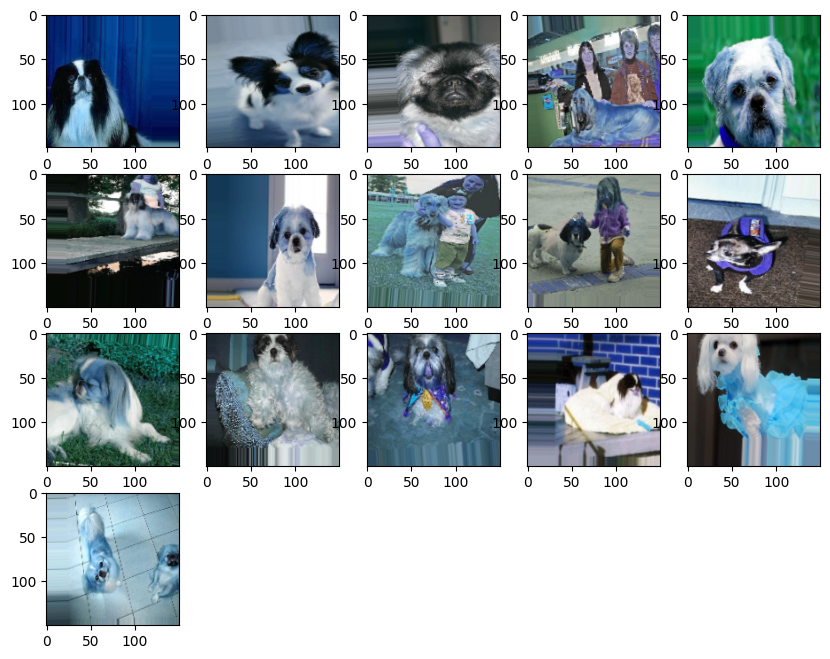

In [10]:
# 给验证集（省事用测试集了）同样使用generator

augs_gen_test = ImageDataGenerator(
            zca_whitening=False,
            rotation_range=10,
            width_shift_range=0.2,
            height_shift_range=0.2,
            zoom_range=0.1,
            horizontal_flip=True,
            vertical_flip=False)
augs_gen_test.fit(X_test)

tmp_batchsz_test = 16
tmp_iter_test = augs_gen_test.flow(X_test,y_test,batch_size=tmp_batchsz_test)

plt.gcf().set_size_inches(10, 10)
for x_batch, y_batch in tmp_iter_test:
    for i in range(0, tmp_batchsz_test):
#         print(x_batch[0].shape)
        plt.subplot(5, 5, i+1)
        plt.imshow(x_batch[i].reshape(150, 150, 3), cmap=plt.get_cmap('viridis'))
    break

In [11]:
history = cnn.fit_generator(tmp_iter,
                            steps_per_epoch=len(X_train)/tmp_batchsz,
#                             steps_per_epoch=96,
                            verbose=1,
                            validation_data=tmp_iter_test,
                            validation_steps=len(X_test)/tmp_batchsz_test,
                            epochs=50)

Epoch 1/50


/tmp/ipykernel_26/1684736524.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = cnn.fit_generator(tmp_iter,
2024-03-20 07:39:49.943858: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1710920394.444928      70 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


96/96 [==============================] - 18s 103ms/step - loss: 2.3291 - acc: 0.1262 - val_loss: 2.3008 - val_acc: 0.0857
Epoch 2/50
96/96 [==============================] - 9s 92ms/step - loss: 2.2914 - acc: 0.1477 - val_loss: 2.2994 - val_acc: 0.1195
Epoch 3/50
96/96 [==============================] - 9s 92ms/step - loss: 2.2928 - acc: 0.1210 - val_loss: 2.2978 - val_acc: 0.1195
Epoch 4/50
96/96 [==============================] - 9s 92ms/step - loss: 2.2912 - acc: 0.1282 - val_loss: 2.2986 - val_acc: 0.1195
Epoch 5/50
96/96 [==============================] - 9s 92ms/step - loss: 2.2934 - acc: 0.1282 - val_loss: 2.2964 - val_acc: 0.1351
Epoch 6/50
96/96 [==============================] - 9s 92ms/step - loss: 2.2931 - acc: 0.1100 - val_loss: 2.2985 - val_acc: 0.1195
Epoch 7/50
96/96 [==============================] - 9s 91ms/step - loss: 2.2897 - acc: 0.1217 - val_loss: 2.3008 - val_acc: 0.1351
Epoch 8/50
96/96 [==============================] - 9s 95ms/step - loss: 2.2918 - acc: 0.123

In [12]:
# history = cnn.fit(X_train,y_train,batch_size=16,
#                   epochs=50,
#                   verbose=1,
#                   validation_data=(X_test, y_test))

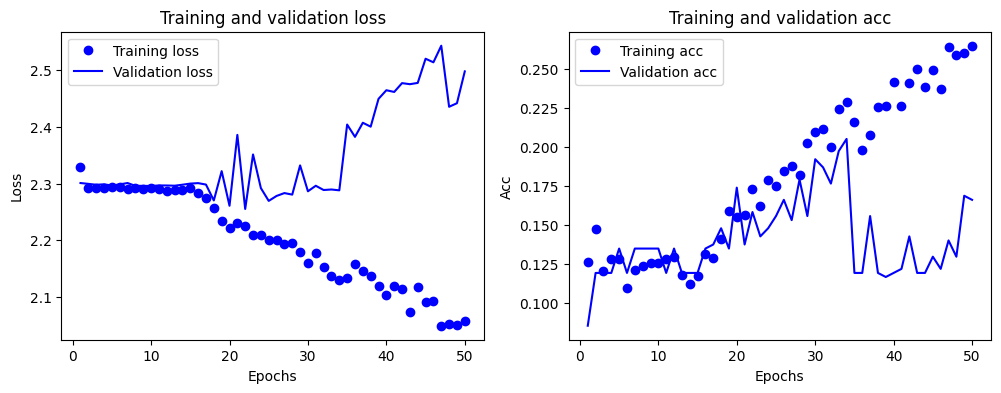

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

def show_history(history): # 显示训练过程中的学习曲线
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss)+1)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
    plt.show()

show_history(history)

1/1 [==============================] - 0s 235ms/step


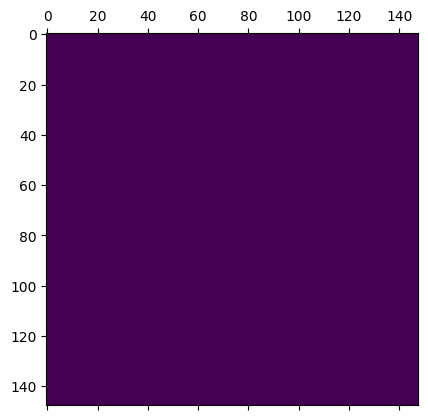

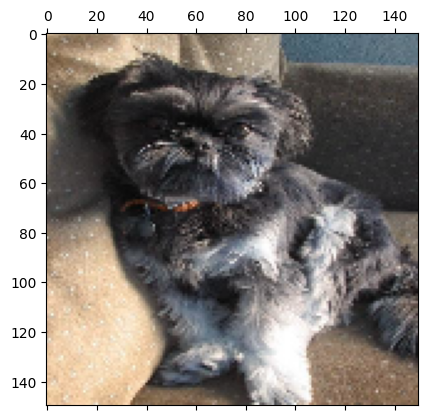

In [14]:
from keras.models import load_model
import matplotlib.pyplot as plt

cnn.save('../my_dog_cnn.keras') # 创建一个HDF5格式的文件
model = load_model('../my_dog_cnn.keras')
layer_outputs = [layer.output for layer in model.layers[:16]]
image = X_train[0]
image = image.reshape(1, 150, 150, 3)
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(image)
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 26], cmap='viridis') # 这个通道比较明显是在提取暗色面
plt.matshow(first_layer_activation[0, :, :, 0], cmap='viridis') 
plt.imshow(X_train[0])